#### Dataset Description

- Data collected for the customer
- Spending Score is the metric made by the mall about how much each customer spends
    - Lower the score the lesser they spend, the higher the score the more they spend
- They want to identify some pattern in their customer
- This time we don't know what to predict
- We still know we want to identify some pattern

- #### How ?
    - We will create (build) a dependent variable, 4 or 5 finite variable and each of the variable will be a class of this dependent variable
    - we will buld a new dependent variable in such a way that each of the value of this future dependent variable are the classes of the dependent variable

- #### Note 
    - That we won't do **Train Test Split** because we don't know the dependent variable

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

- customer ID column has no impact as being the dependent variable
- In order for the Visualization Purpose we will need 2 features (Lecture Purpose) 
    - Annual Income
    - Spending Score

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,-2:].values # Exclude Customer ID
# OR 
# X = dataset.iloc[:,[3,4]].values

# Using the elbow method to find the optimal number of clusters

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


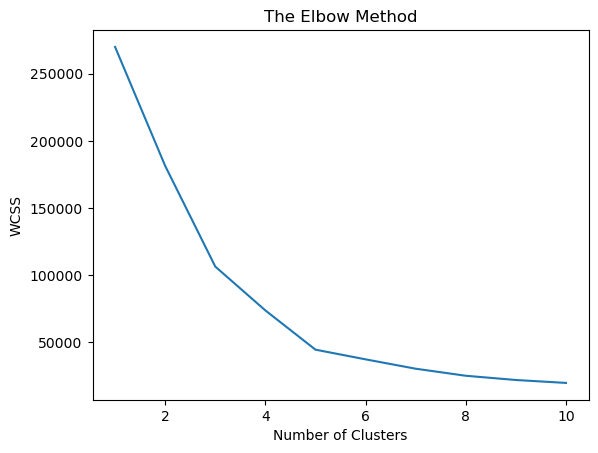

In [9]:
from sklearn.cluster import KMeans
# Run for loop and check WCSS for different number of cluster
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
print('Minumum: ',min(wcss))
print('Maximum: ',max(wcss))

Minumum:  19672.07284901432
Maximum:  269981.28


# Train the K-Means Clustering Algorithm

In [28]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
# kmeans.fit(X)
# kmeans.predict(X)
# OR
y_kmeans = kmeans.fit_predict(X) # Creating a dependent variable

In [31]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visualize the Clusters

X[y_kmeans == 0,0] selects all the rows of the customers annual income whose y_kmeans is 0 
X[y_kmeans == 0,1] selects all the rows of the customers spending scor whose y_kmeans is 0 

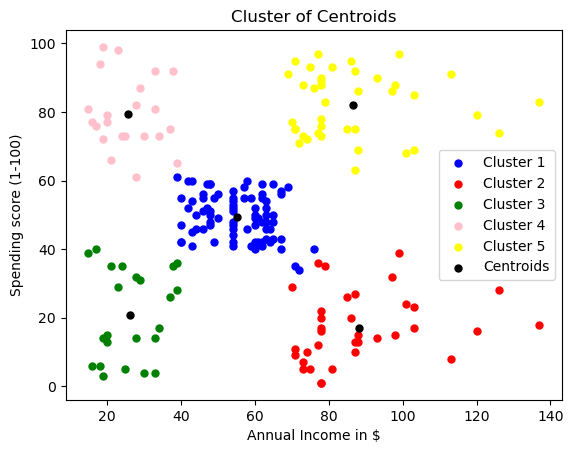

In [50]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=25,c='blue',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=25,c='red',label='Cluster 2') 
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=25,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=25,c='pink',label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=25,c='yellow',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=25,c='black',label='Centroids')
plt.title('Cluster of Centroids')
plt.xlabel('Annual Income in $')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()